# Alzheimer Disease and Healthy Aging Data In US

In [2]:
# 先读取数据
import pandas as pd
data = pd.read_csv('/home/yimeng/my_test/course/DataMining/ThirWeek/Alzheimer Disease and Healthy Aging Data In US.csv')

/tmp/ipykernel_2789374/1595733809.py:3: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/yimeng/my_test/course/DataMining/ThirWeek/Alzheimer Disease and Healthy Aging Data In US.csv')


## 数据摘要和可视化
### 数据摘要
#### 标称属性：给出每个可能取值的频数

In [3]:
# 分析标称数据
nominal_data = data.select_dtypes(include=['object'])  # 选择标称数据类型的列
for column in nominal_data.columns:
    print(f"列名：{column}")
    print(nominal_data[column].value_counts())  # 计算每个值的频数
    print()

列名：LocationAbbr
LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
SD      3526
OK      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
MT      3348
WA      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: count, dtype: int64

列名：LocationDesc
LocationDesc
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                     

#### 数值属性：给出5数概括，及缺失值的个数

In [4]:
# 分析数值属性
numeric_data = data.select_dtypes(include=['number'])   # 选择数值数据类型的列
numeric_summary = numeric_data.describe()   # 计算数值属性的五数概括
missing_values_count = data.isnull().sum()  # 统计每列的缺失值个数

# 打印数值属性的五数概括和缺失值的个数
print("数值属性的五数概括：")
print(numeric_summary)
print("\n缺失值的个数：")
print(missing_values_count)

数值属性的五数概括：
           YearStart        YearEnd     Data_Value  Data_Value_Alt  \
count  214462.000000  214462.000000  144629.000000   144629.000000   
mean     2017.378477    2017.634000      37.341956       37.341956   
std         1.779822       1.778926      25.183017       25.183017   
min      2015.000000    2015.000000       0.000000        0.000000   
25%      2016.000000    2016.000000      15.300000       15.300000   
50%      2017.000000    2018.000000      32.500000       32.500000   
75%      2019.000000    2019.000000      56.800000       56.800000   
max      2020.000000    2020.000000     100.000000      100.000000   

       Sample_Size     LocationID  
count          0.0  214462.000000  
mean           NaN     800.987821  
std            NaN    2512.934094  
min            NaN       1.000000  
25%            NaN      18.000000  
50%            NaN      33.000000  
75%            NaN      49.000000  
max            NaN    9004.000000  

缺失值的个数：
YearStart                

### 数据可视化
使用直方图、盒图等检查数据分布及离散群点
* 直方图：对所有数值类型的列，先剔除其缺失数据，然后绘制剩下的数据的直方图
* 盒图：对所有数值类型的列，先剔除其缺失数据，然后绘制剩下的数据的盒图

In [5]:
# 导入必要的库
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

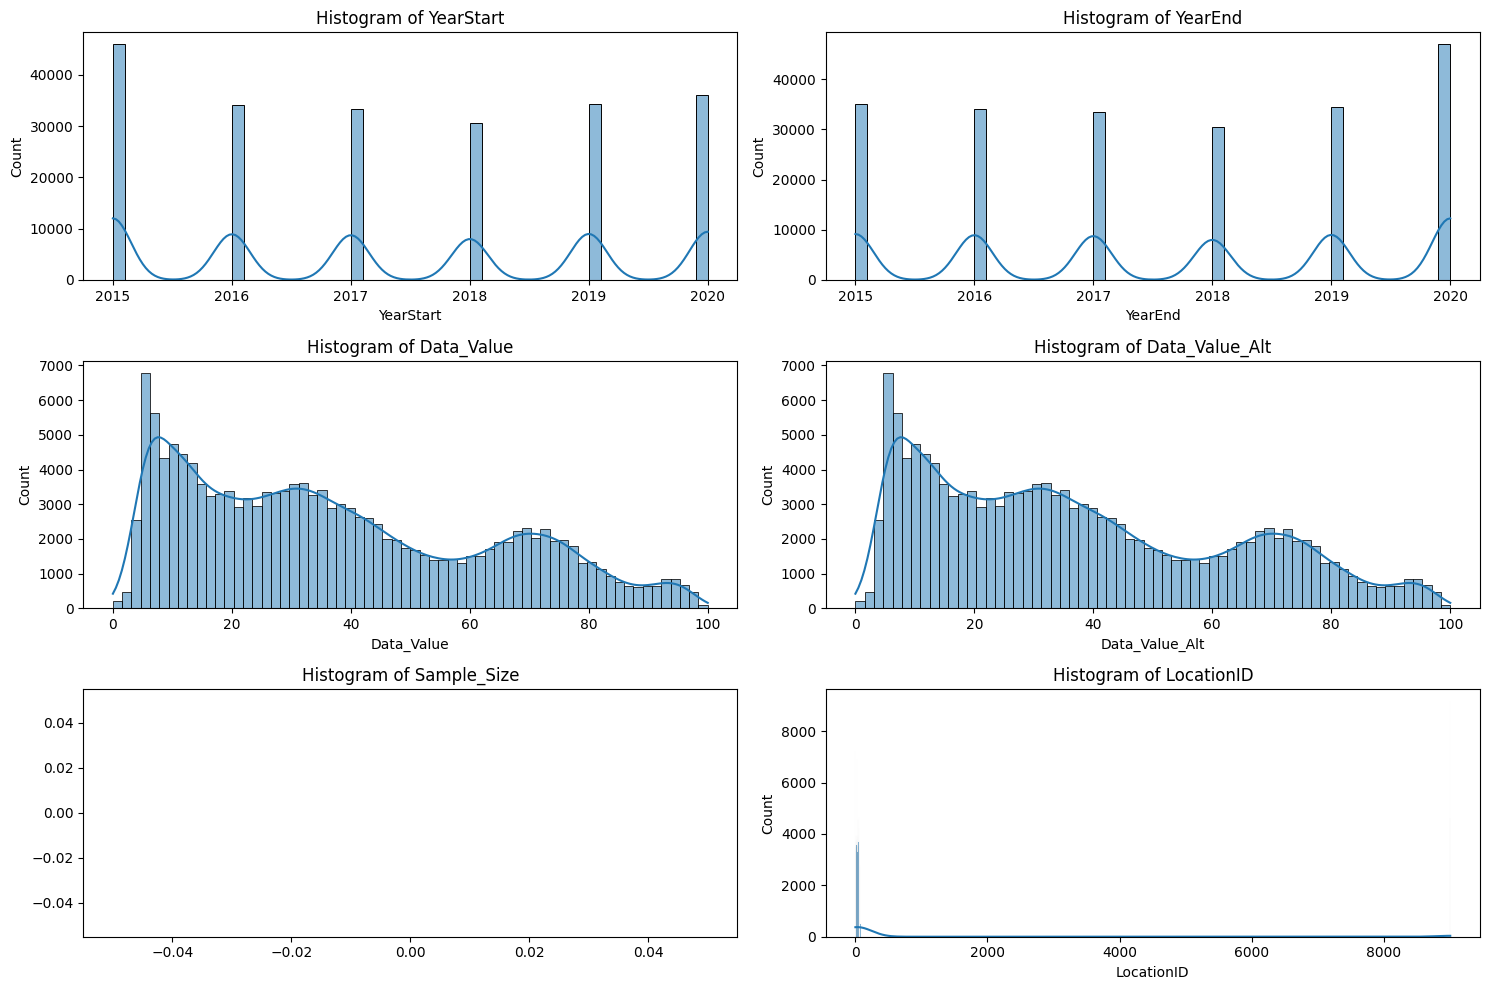

In [6]:
# 选择数值数据类型的列
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 计算子图的行数和列数
num_columns = len(numeric_data.columns)
num_rows = math.ceil(num_columns / 2)

# 绘制直方图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns):
    # 剔除当前列含有缺失值的行
    column_no_missing = data.dropna(subset=[column])
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(column_no_missing[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

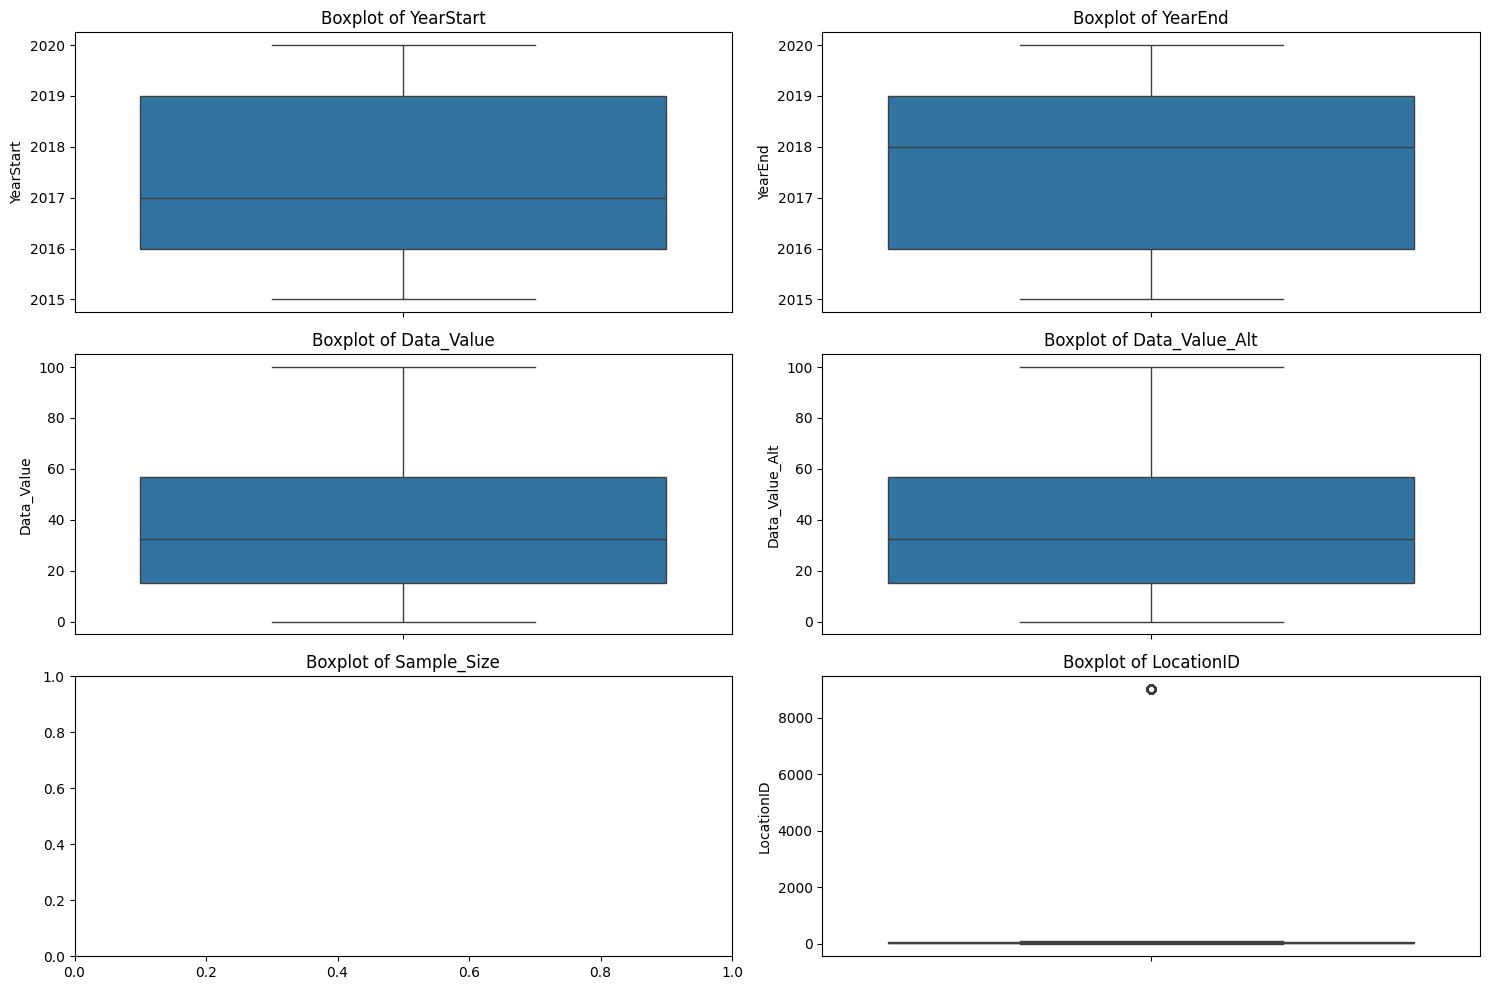

In [7]:
# 选择数值数据类型的列
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 绘制盒图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns):
    # 剔除当前列含有缺失值的行
    column_no_missing = data.dropna(subset=[column])
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=column_no_missing[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## 数据缺失的处理
观察数据集中缺失的数据：由上面分析，缺失数据集的列和缺失数量如下：
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
分别使用四种策略对缺失值进行处理：

### 将缺失部分剔除
* 剔除含缺失部分的行
    因为所有行的Sample_Size列的值都缺失，所以，剔除除了Sample_Size列以外含有缺失值的行的代码如下，
    显示处理后的数据集仅有97238行完整数据。这是一种明显不合适的处理方式
* 剔除含缺失部分的列
    对于这种处理方式，我认为可以仅剔除Sample_Size列，因为所有的行都没有这个属性
    而其他缺失数据的列的缺失个数都不超过数据行的一半，所以我认为不应该将其剔除
    所以剔除Sample_Size列后的数据集大小为：(214462, 28)

In [8]:
# 备份原始数据集
process1_data = data.copy()
# 查看除了Sample_Size列以外其他列的缺失值情况
missing_values_except_sample_size = process1_data.drop("Sample_Size", axis=1).isnull().any(axis=1)

# 将除了Sample_Size列以外含有缺失值的行剔除
cleaned_data_dropna_except_sample_size = process1_data[~missing_values_except_sample_size]

# 保存处理后的数据集
cleaned_data_dropna_except_sample_size.to_csv("/home/yimeng/my_test/course/DataMining/ThirWeek/cleaned_data_dropna_except_sample_size.csv", index=False)

# 比较新旧数据集的差异
print("原始数据集大小:", data.shape)
print("处理后数据集大小:", cleaned_data_dropna_except_sample_size.shape)

原始数据集大小: (214462, 29)
处理后数据集大小: (97238, 29)


### 用最高频率值来填补缺失值
很显然，Sample_Size列无最高频率值，所以此列不做处理
* 对于标称属性，使用最高频数来填补缺失值；
* 对于数值属性，使用均值来填补。

In [9]:
# 备份原始数据集
process2_data = data.copy()

# 分析标称数据
nominal_data = process2_data.select_dtypes(include=['object'])  # 选择标称数据类型的列

# 标称属性处理：用最高频率值填补缺失值
for column in nominal_data.columns:
    # 计算每列的最高频率值
    mode_value = nominal_data[column].mode()[0]
    # 填补缺失值
    process2_data[column].fillna(mode_value, inplace=True)

# 选择数值数据类型的列
numeric_data = process2_data.select_dtypes(include=['float64', 'int64'])

# 数值属性处理：用均值填补缺失值
for column in numeric_data.columns:
    # 计算每列的均值
    mean_value = numeric_data[column].mean()
    # 填补缺失值
    process2_data[column].fillna(mean_value, inplace=True)

# 保存处理后的数据集
process2_data.to_csv("/home/yimeng/my_test/course/DataMining/ThirWeek/cleaned_data_highest_freq_fill.csv", index=False)

/tmp/ipykernel_2789374/61056319.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  process2_data[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_2789374/61056319.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

对这种方式，
* 对标称属性，直接分析比较填补前后属性的缺失值个数
* 对数值属性，绘制处理后的数值类型列的直方图和盒图，与上方剔除缺失值绘制的直方图和盒图比较

填补前后每个标称属性的缺失值个数：
                           原始数据集缺失值个数  填补后数据集缺失值个数
LocationAbbr                        0            0
LocationDesc                        0            0
Datasource                          0            0
Class                               0            0
Topic                               0            0
Question                            0            0
Data_Value_Unit                     0            0
DataValueTypeID                     0            0
Data_Value_Type                     0            0
Low_Confidence_Limit            69990            0
High_Confidence_Limit           69990            0
StratificationCategory1             0            0
Stratification1                     0            0
StratificationCategory2         27669            0
Stratification2                 27669            0
Geolocation                     23049            0
ClassID                             0            0
TopicID                             0            0
QuestionID   

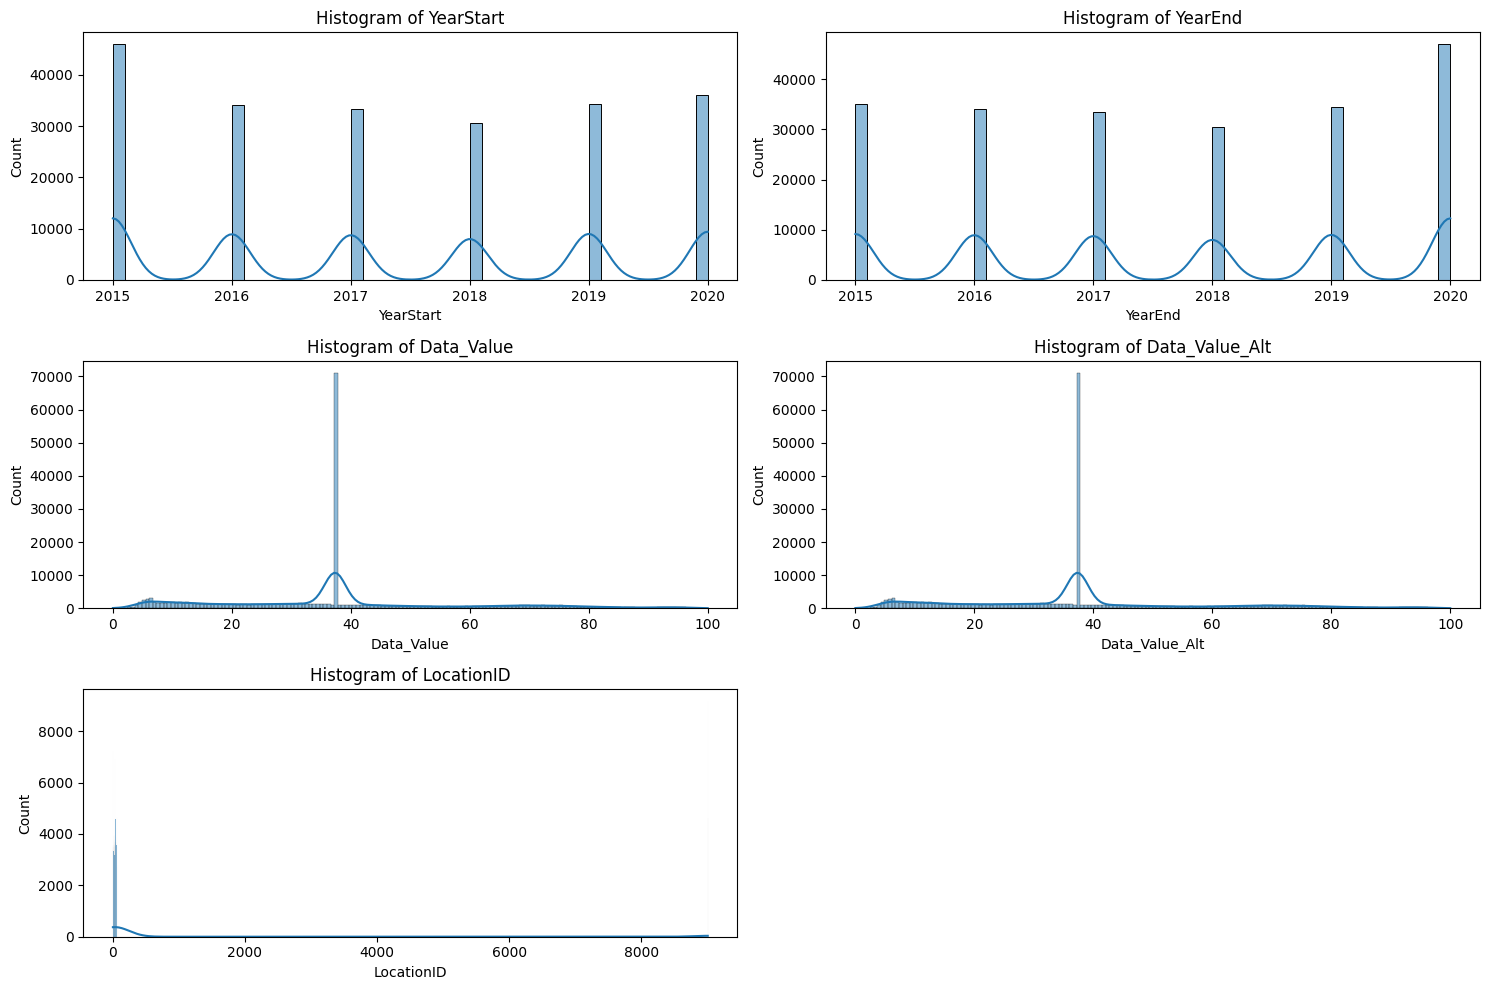

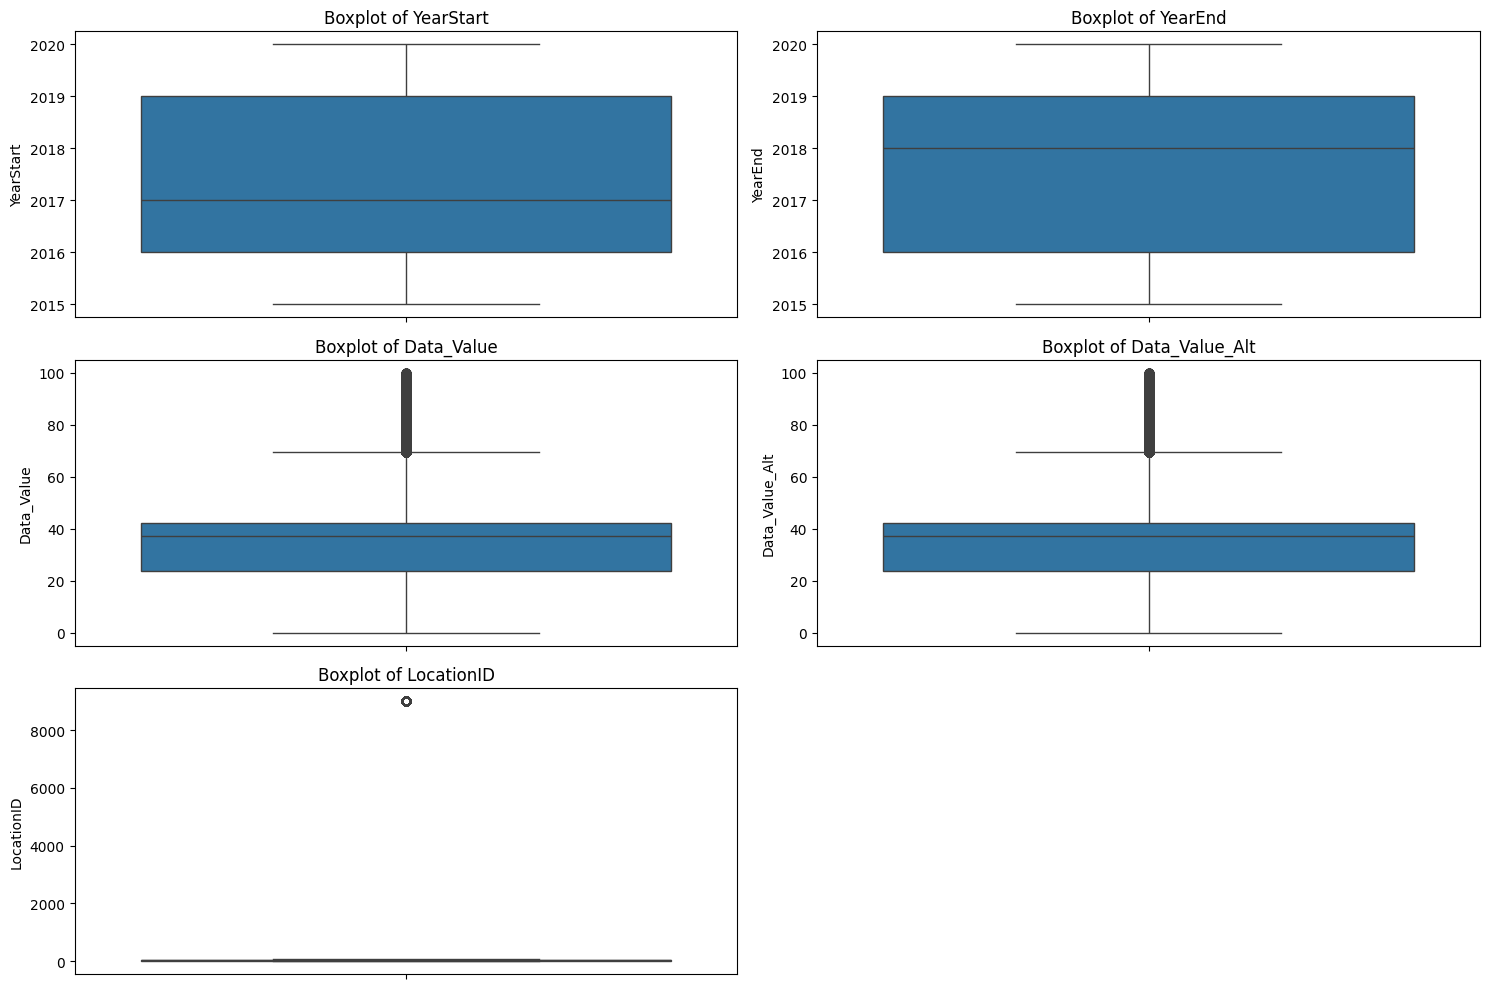

In [10]:
# 计算填补前后每个标称属性的缺失值个数
original_nominal_missing_values = nominal_data.isnull().sum()
filled_nominal_missing_values = process2_data.select_dtypes(include=['object']).isnull().sum()

# 将缺失值个数数据合并到一个DataFrame中
missing_values_comparison = pd.concat([original_nominal_missing_values, filled_nominal_missing_values], axis=1)
missing_values_comparison.columns = ['原始数据集缺失值个数', '填补后数据集缺失值个数']

# 打印比较结果
print("填补前后每个标称属性的缺失值个数：")
print(missing_values_comparison)


# 选择数值数据类型的列（不包括 Sample_Size 列）
numeric_data_no_sample_size = process2_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Sample_Size'])

# 计算子图的行数和列数
num_columns = len(numeric_data_no_sample_size.columns)
num_rows = math.ceil(num_columns / 2)

# 绘制直方图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data_no_sample_size.columns):
    # 剔除当前列含有缺失值的行
    column_no_missing = process2_data.dropna(subset=[column])
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(column_no_missing[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# 绘制盒图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data_no_sample_size.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=process2_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### 通过属性的相关关系来填补缺失值
* 目前只知道缺失的列和列中缺失值的个数，不足以判断用何种方式来推断缺失值，下面先分析缺失值与其他特征的关系：计算数值特征之间的相关系数

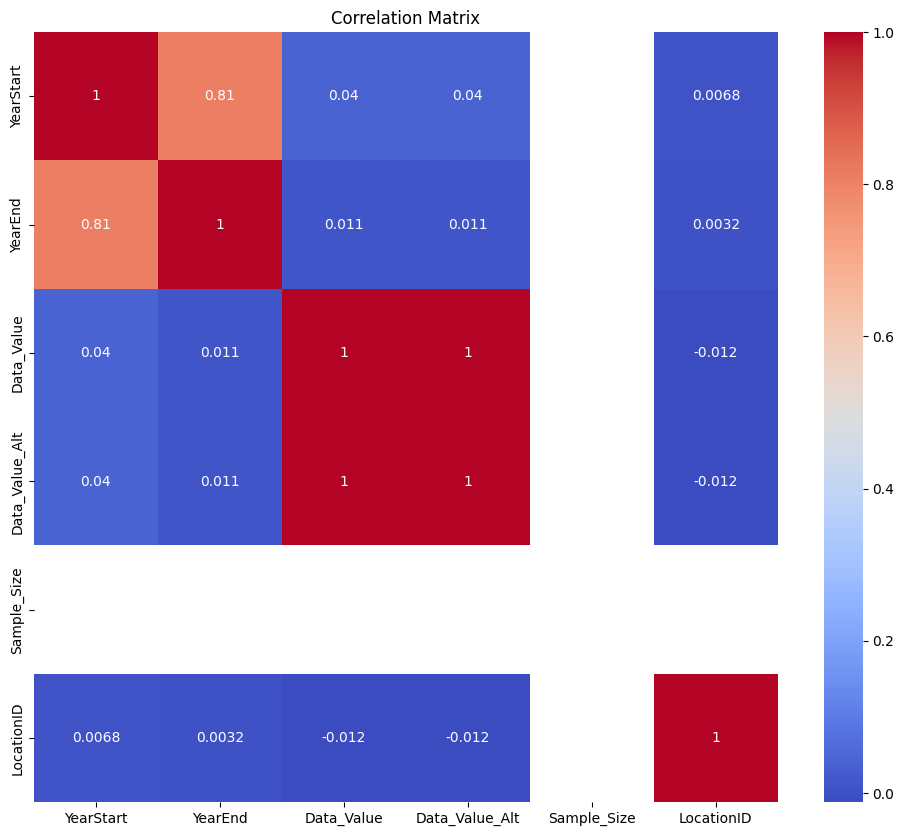

In [10]:
# 备份原始数据集
process3_data = data.copy()
# 选择数值数据类型的列
numeric_data = process3_data.select_dtypes(include=['float64', 'int64'])

# 分析缺失值与其他特征的关系：计算数值特征之间的相关系数
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* 从关系矩阵中可以看出Data_Value和Data_Value_Alt关系最密切，但是均为缺失值，不能通过其他相关属性的信息来推断缺失值

### 通过数据对象之间的相似性来填补缺失值
基于数据对象之间的相似性来填补缺失值，可以通过计算数据对象之间的距离或相似度，然后利用最近邻的数据对象的信息来填补缺失值。本实验采用使用KNN填充器拟合数据并填补缺失值

In [14]:
from sklearn.impute import KNNImputer

# 备份原始数据集
process3_data = data.copy()

# 删除 Sample_Size 列
process3_data.drop("Sample_Size", axis=1, inplace=True)

# 创建一个KNN填充器对象
knn_imputer = KNNImputer(n_neighbors=5)

# 选择所有数值类型的列作为要填充的特征列
numeric_features = process3_data.select_dtypes(include=['float64', 'int64']).columns

# 提取包含缺失值的子集
subset_with_missing_values = process3_data[numeric_features]

# 使用KNN填充器拟合数据并填补缺失值
filled_data = knn_imputer.fit_transform(subset_with_missing_values)

# 将填补后的数据转换为DataFrame
filled_data_df = pd.DataFrame(filled_data, columns=numeric_features)

# 将填补后的数据放回原始数据集中
process3_data[numeric_features] = filled_data_df

In [15]:
# 原始数据的五数指标
original_data_statistics = data[['Data_Value', 'Data_Value_Alt']].describe()

# 填充后的数据的五数指标
filled_data_statistics = process3_data[['Data_Value', 'Data_Value_Alt']].describe()

# 输出对比结果
print("原始数据的五数指标：")
print(original_data_statistics)

print("\n填充后的数据的五数指标：")
print(filled_data_statistics)

原始数据的五数指标：
          Data_Value  Data_Value_Alt
count  144629.000000   144629.000000
mean       37.341956       37.341956
std        25.183017       25.183017
min         0.000000        0.000000
25%        15.300000       15.300000
50%        32.500000       32.500000
75%        56.800000       56.800000
max       100.000000      100.000000

填充后的数据的五数指标：
          Data_Value  Data_Value_Alt
count  214462.000000   214462.000000
mean       37.348365       37.348365
std        21.705646       21.705646
min         0.000000        0.000000
25%        21.600000       21.600000
50%        34.300000       34.300000
75%        49.600000       49.600000
max       100.000000      100.000000


和上面的原数据的Data_Value和Data_Value_Alt的五数统计相比，可以明显看到变化

# GitHub Dataset

In [1]:
# 先读取数据
import pandas as pd
data3 = pd.read_csv('/home/yimeng/my_test/course/DataMining/ThirWeek/github_dataset.csv')
# 获取每列的类型并打印输出
column_types = data3.dtypes
print("版本1的属性类型")
print(column_types)

版本1的属性类型
repositories     object
stars_count       int64
forks_count       int64
issues_count      int64
pull_requests     int64
contributors      int64
language         object
dtype: object


## 数据摘要和可视化
### 数据摘要
#### 标称属性：给出每个可能取值的频数

In [2]:
# 分析标称数据
nominal_data = data3.select_dtypes(include=['object'])  # 选择标称数据类型的列
for column in nominal_data.columns:
    print(f"列名：{column}")
    print(nominal_data[column].value_counts())  # 计算每个值的频数
    print()

列名：repositories
repositories
aloisdeniel/dart-opencage-geocoder               2
carloscuesta/n26-github-actions-demo             2
vasu-1/GithubBotApp                              2
lukefire5156/REMOTE-EDUCATION-APP---EMAGISTER    2
justinshenk/deepemotion                          2
                                                ..
ethereum/blake2b-py                              1
openfoodfacts/folksonomy_mobile_experiment       1
WhiteHouse/buildmanager                          1
torvalds/test-tlb                                1
ralexstokes/deposit-verifier                     1
Name: count, Length: 972, dtype: int64

列名：language
language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust         

#### 数值属性：给出5数概括，及缺失值的个数

In [3]:
# 分析数值属性，排除第一个未命名列
numeric_data = data3.drop(columns=data3.columns[0]).select_dtypes(include=['number'])   # 删除第一个未命名列并选择数值数据类型的列
numeric_summary = numeric_data.describe()   # 计算数值属性的五数概括
missing_values_count = data3.drop(columns=data3.columns[0]).isnull().sum()  # 统计每列的缺失值个数

# 打印数值属性的五数概括和缺失值的个数
print("数值属性的五数概括：")
print(numeric_summary)
print("\n缺失值的个数：")
print(missing_values_count)

数值属性的五数概括：
       stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

缺失值的个数：
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64


### 数据可视化
使用直方图、盒图等检查数据分布及离散群点
* 直方图：对所有数值类型的列，先剔除其缺失数据，然后绘制剩下的数据的直方图
* 盒图：对所有数值类型的列，先剔除其缺失数据，然后绘制剩下的数据的盒图

In [4]:
# 导入必要的库
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

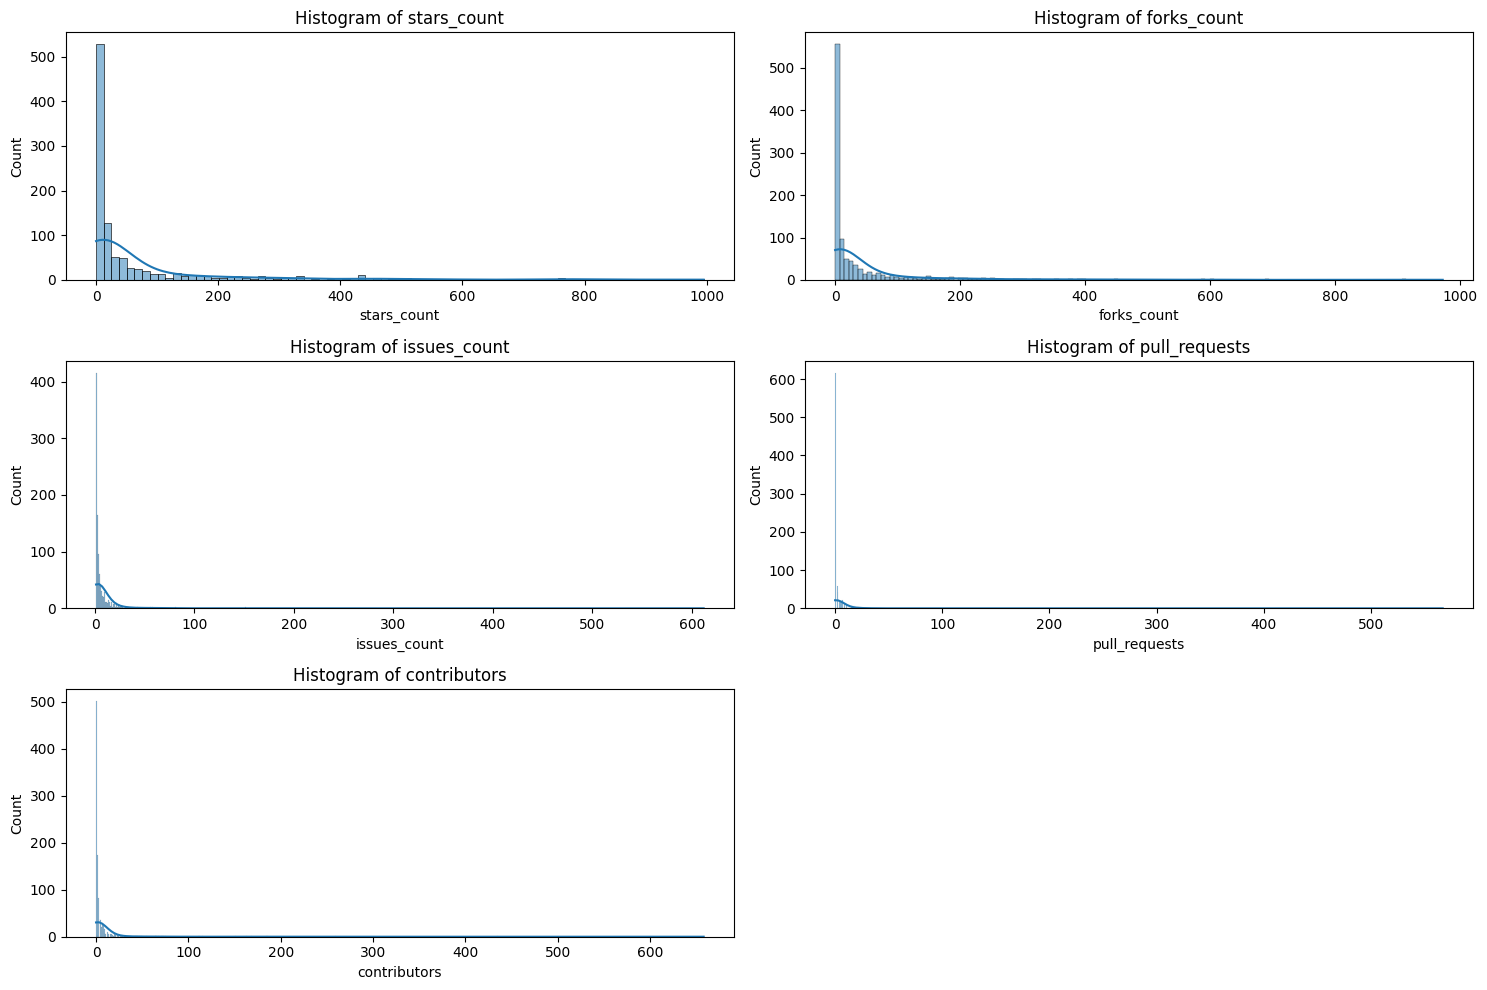

In [5]:
# 选择数值数据类型的列，不包括第一个未命名列
numeric_data = data3.select_dtypes(include=['float64', 'int64'])

# 计算子图的行数和列数
num_columns = len(numeric_data.columns)
num_rows = math.ceil(num_columns / 2)

# 绘制直方图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns):
    # 剔除当前列含有缺失值的行
    column_no_missing = data3.dropna(subset=[column])
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(column_no_missing[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

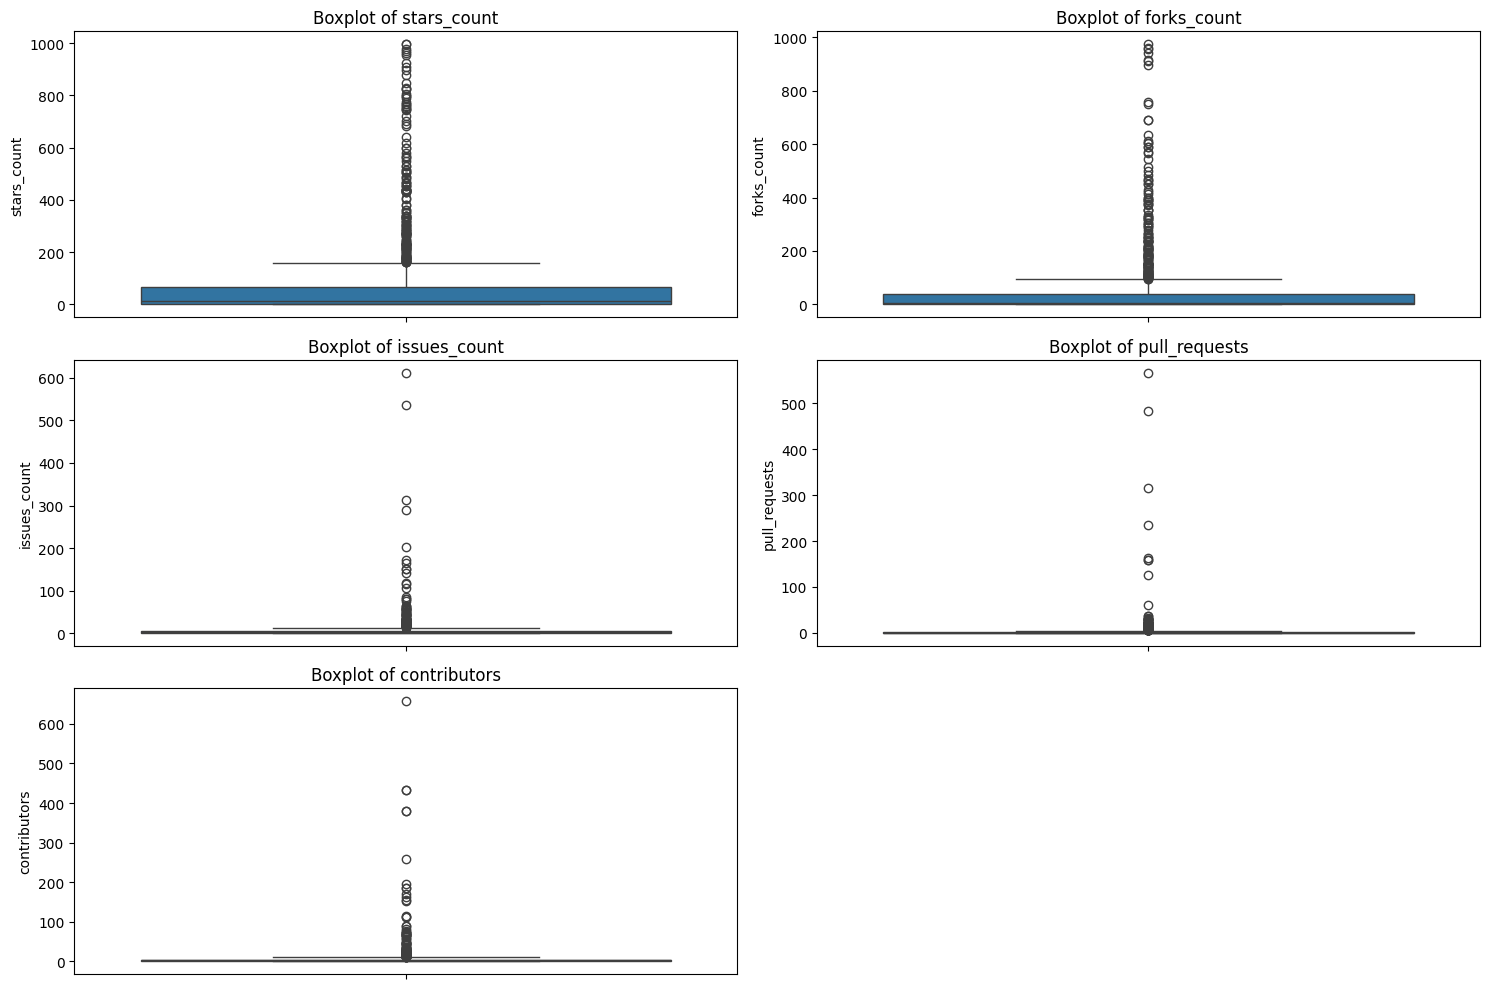

In [6]:
# 选择数值数据类型的列，不包括第一个未命名列
numeric_data = data3.select_dtypes(include=['float64', 'int64'])

# 绘制盒图
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_data.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.boxplot(y=data3[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## 数据缺失的处理
观察数据集中缺失的数据
分别使用四种策略对缺失值进行处理：
### 将缺失部分剔除
剔除含缺失部分的行

In [7]:
# 读取数据集
process1_data3 = pd.read_csv('/home/yimeng/my_test/course/DataMining/ThirWeek/github_dataset.csv')

# 剔除 IMDb-rating 和 appropriate_for 列含有缺失值的行
data_cleaned = process1_data3.dropna(subset=['language'])

# 比较新旧数据集的差异
print("原始数据集大小:", data3.shape)
print("处理后数据集大小:", data_cleaned.shape)

原始数据集大小: (1052, 7)
处理后数据集大小: (907, 7)


### 用最高频率值来填补缺失值
* 对于标称属性，使用频数最高值来填补缺失值；直接分析比较填补前后属性的缺失值个数
* 对于数值属性，使用均值来填补；分析比较填补前后IMDb-rating属性的五数概括，可以发现填补均值后，只会影响到数据的中心趋势，而不会影响数据的分布形状和数据的极端值
本数据集中只缺失标称属性

In [8]:
# 备份原始数据集
process2_data3 = data3.copy()

# 分析标称数据
nominal_data = process2_data3.select_dtypes(include=['object'])  # 选择标称数据类型的列

# 标称属性处理：用最高频率值填补缺失值
for column in nominal_data.columns:
    # 计算每列的最高频率值
    mode_value = nominal_data[column].mode()[0]
    # 填补缺失值
    process2_data3[column].fillna(mode_value, inplace=True)
    
# 保存处理后的数据集
process2_data3.to_csv("/home/yimeng/my_test/course/DataMining/ThirWeek/github_dataset_highest_freq_fill.csv", index=False)

/tmp/ipykernel_2941160/314967784.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  process2_data3[column].fillna(mode_value, inplace=True)


In [9]:
# 计算填补前后每个标称属性的缺失值个数
original_nominal_missing_values = data3.select_dtypes(include=['object']).isnull().sum()
filled_nominal_missing_values = process2_data3.select_dtypes(include=['object']).isnull().sum()

# 将缺失值个数数据合并到一个DataFrame中
missing_values_comparison = pd.concat([original_nominal_missing_values, filled_nominal_missing_values], axis=1)
missing_values_comparison.columns = ['原始数据集缺失值个数', '填补后数据集缺失值个数']

# 打印比较结果
print("填补前后每个标称属性的缺失值个数：")
print(missing_values_comparison)

填补前后每个标称属性的缺失值个数：
              原始数据集缺失值个数  填补后数据集缺失值个数
repositories           0            0
language             145            0


### 通过属性的相关关系来填补缺失值
通过计算language列和其他属性的相关关系，如下，通过结果可以看出language与其他属性的关系不密切，不能通过属性的相关关系来填补缺失值

In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import pearsonr

# 读取数据集
process3_data3 = pd.read_csv('/home/yimeng/my_test/course/DataMining/ThirWeek/github_dataset.csv')

# 切片，仅保留需要填补的列和数值属性
data_to_fill = process3_data3[['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors', 'language']]

# 使用OrdinalEncoder将标称属性转换为数值形式
ordinal_encoder = OrdinalEncoder()
data_to_fill['language'] = ordinal_encoder.fit_transform(data_to_fill[['language']])

# 删除含有缺失值的行
data_to_fill = data_to_fill.dropna()

# 计算相关系数
correlations = {}
for col in data_to_fill.columns:
    correlation, _ = pearsonr(data_to_fill[col], data_to_fill['language'])
    correlations[col] = correlation

# 输出相关系数
print("language列和其他属性的相关关系: ")
for col, corr in correlations.items():
    print(f"{col}: {corr}")

language列和其他属性的相关关系: 
stars_count: 0.015146262721328055
forks_count: -0.03833302674683592
issues_count: -0.026750248190720135
pull_requests: -0.04491838752078779
contributors: -0.05346307086524935
language: 1.0


/tmp/ipykernel_2941160/4083031674.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_fill['language'] = ordinal_encoder.fit_transform(data_to_fill[['language']])


### 通过数据对象之间的相似性来填补缺失值
基于数据对象之间的相似性来填补缺失值，可以通过计算数据对象之间的距离或相似度，然后利用最近邻的数据对象的信息来填补缺失值。本实验采用使用KNN填充器拟合数据并填补缺失值

In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# 读取数据集
process4_data3 = pd.read_csv('/home/yimeng/my_test/course/DataMining/ThirWeek/github_dataset.csv')

# 切片，仅保留需要填补的列
data_to_fill = process4_data3[['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors', 'language']]

# 使用OrdinalEncoder将标称属性转换为数值形式
ordinal_encoder = OrdinalEncoder()
data_to_fill['language'] = ordinal_encoder.fit_transform(data_to_fill[['language']])

# 创建一个KNN填补器对象
imputer = KNNImputer(n_neighbors=5)

# 填补缺失值
filled_data = imputer.fit_transform(data_to_fill)

# 将填补后的数据转换为DataFrame
filled_data = pd.DataFrame(filled_data, columns=data_to_fill.columns)

# 将language列还原回标称属性形式
filled_data['language'] = ordinal_encoder.inverse_transform(filled_data[['language']]).flatten()

# 计算填补前后每个标称属性的缺失值个数
original_nominal_missing_values = data3.select_dtypes(include=['object']).isnull().sum()
filled_nominal_missing_values = filled_data.select_dtypes(include=['object']).isnull().sum()

# 将缺失值个数数据合并到一个DataFrame中
missing_values_comparison = pd.concat([original_nominal_missing_values, filled_nominal_missing_values], axis=1)
missing_values_comparison.columns = ['原始数据集缺失值个数', '填补后数据集缺失值个数']

# 打印比较结果
print("填补前后每个标称属性的缺失值个数：")
print(missing_values_comparison)

填补前后每个标称属性的缺失值个数：
              原始数据集缺失值个数  填补后数据集缺失值个数
repositories           0          NaN
language             145          0.0


/tmp/ipykernel_2941160/4060344988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_fill['language'] = ordinal_encoder.fit_transform(data_to_fill[['language']])


从结果可以看出language属性的缺失值被成功填补